# Sampling Distributions Dance Party!

Get your dancing shoes ready! You are a DJ trying to make sure you are ready for a big party. You don’t have time to go through all the songs you can work with. Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started. To do this, you will use the power of sampling distributions!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from helper_functions import choose_statistic, population_distribution, sampling_distribution

### Loading in the Data

1. You will be working with a dataset called spotify_data.csv. In script.py, use the read_csv() pandas function to load in spotify_data.csv into a variable called spotify_data.

In [2]:
spotify_data = pd.read_csv("spotify_data.csv")

2. Use the pandas .head() function to preview the spotify_data. If you need a reminder of how to use this function, click the hint below.

In [3]:
spotify_data.head()

,tempo,danceability,energy,instrumentalness,liveness,valence
0,156.985,0.831,0.814,0.013400,0.0556,0.3890
1,115.080,0.719,0.493,0.000000,0.1180,0.1240
2,218.050,0.850,0.893,0.000004,0.3720,0.0391
3,186.948,0.476,0.781,0.000000,0.1140,0.1750
4,147.988,0.798,0.624,0.000000,0.1660,0.5910


3. For this project, we are going to focus on the tempo variable. This column gives the beats per minute (bpm) of each song in spotify.csv. The other columns in our dataset are:

- danceability
- energy
- instrumentalness
- liveness
- valences

    For now, we are going to ignore these other columns.

    Create a variable called song_tempos that contains the tempo column data.

In [4]:
song_tempos = spotify_data['tempo']

### Helper Functions

4. Let’s investigate the helper functions we will use in the following sections. A file called helper_functions.py should be opened in the workspace for you. It contains three functions: choose_statistic(), population_distribution(), and sampling_distribution(). The code in these functions is similar to what we saw in the previous lesson, but let’s explore these together.

    `choose_statistic()` allows us to choose a statistic we want to calculate for our sampling and population distributions. It contains two parameters:

- x: An array of numbers

- sample_stat_text: A string that tells the function which statistic to calculate on x. It takes on three values: “Mean”, “Minimum”, or “Variance”.

    `population_distribution()` allows us to plot the population distribution of a dataframe with one function call. It takes the following parameter:

- `population_data`: the dataframe being passed into the function

    `sampling_distribution()` allows us to plot a simulated sampling distribution of a statistic. The simulated sampling distribution is created by taking random samples of some size, calculating a particular statistic, and plotting a histogram of those sample statistics. It contains three parameters:

- `population_data`: the dataframe being sampled from
- `samp_size`: the size of each sample
- `stat`: the specific statistic being measured for each sample — either “Mean”, “Minimum”, or “Variance”

### Sampling Distribution Exploration

5. Now that our data is loaded into script.py and we have gone over the functions in helper_functions.py let’s start our sampling distributions exploration. Make sure to write your code in script.py.

    To start off, let’s use the population_distribution() function to graph distribution of song_tempos.

    When you click run, you should see a graph with the following title:

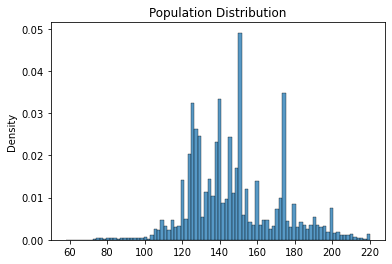

<Figure size 432x288 with 0 Axes>

In [5]:
population_distribution(song_tempos)

6. Now let’s plot the sampling distribution of the sample mean with sample sizes of 30 songs. To do this, use the sampling_distribution() helper function.

    Once you hit run, you should see a graph with the following title:

    `Sampling Distribution of the Mean`
    
    `Mean of the Sample Means: {Mean of the Sample Means}`
    
    `Population Mean: {Population Mean}`

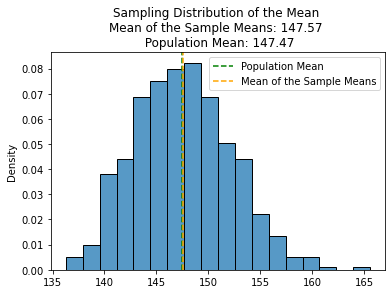

<Figure size 432x288 with 0 Axes>

In [6]:
# task 6: sampling distribution of the sample mean
sampling_distribution(song_tempos, 30, "Mean")

7. Compare your sampling distribution of the sample means to the population mean. Is the sample mean an unbiased or biased estimator of the population?

8. Now let’s plot the sampling distribution of the sample minimum with sample sizes of 30 songs. To do this, use the sampling_distribution() helper function.

    Once you hit run, you should see a graph with the following title:

    `Sampling Distribution of the Minimum`
    
    `Mean of the Sample Minimums: {Mean of the Sample Minimums}`
    
    `Population Mean: {Population Mean}`

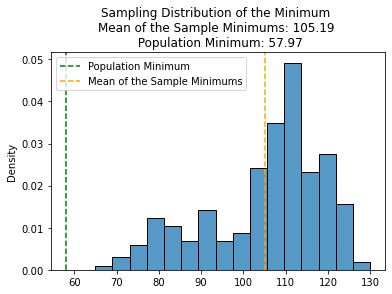

<Figure size 432x288 with 0 Axes>

In [7]:
# task 8: sampling distribution of the sample minimum
sampling_distribution(song_tempos, 30, "Minimum")

9. Compare your sampling distribution of the sample minimums to the population minimum. Is the sample minimum an unbiased or biased estimator of the population?

10. Now let’s plot the sampling distribution of the sample variance with sample sizes of 30 songs. To do this, use the sampling_distribution() helper function.

    Once you hit run, you should see a graph with the following title:

    `Sampling Distribution of the Variance`
    
    `Mean of the Sample Variances: {Mean of the Sample Variances}`
    
    `Population Variance: {Population Variance}`

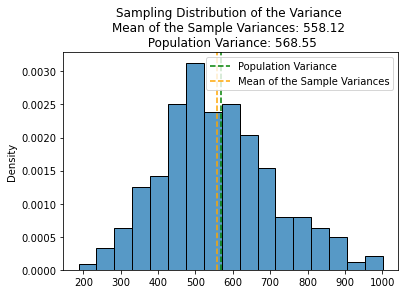

<Figure size 432x288 with 0 Axes>

In [8]:
# task 10: sampling distribution of the sample variance
sampling_distribution(song_tempos, 30, "Variance")

11. Compare your sampling distribution of the sample variance to the population variance. Does the sample variance appear to be an unbiased or biased estimator of the population?

    Click the hint for more information about sample variance.

12. Go to line 17 in helper_functions.py. You should see the following line of code:

    `np.var(x)`

    Change this to:

    `np.var(x, ddof=1)`

    Adding this ddof=1 parameter will divide our input by n-1 instead of n, therefore applying the sample variance formula.

    After changing this line of code, run script.py. Does the sample variance appear to be an unbiased or biased estimator of the population?

### Calculating Probabilities

13. We have a good sense of some sample statistics now that we’ve investigated sampling distributions. Let’s take our analysis further by calculating probabilities.

    First, calculate the population mean and population standard deviation of song_tempos. Save these values in two separate variables called population_mean and population_std.

In [10]:
# task 13: calculate the population mean and standard deviation
population_mean = np.mean(song_tempos)
population_mean

147.4740559035556

In [11]:
population_std = np.std(song_tempos)
population_std

23.8443414956797

14. Use population_mean and population_std to calculate the standard error of the sampling distribution of the sample mean with a sample size of 30.

    Save this value in a variable called standard_error.

In [12]:
# task 14: calculate the standard error
standard_error = population_std/(30**.5)
standard_error

4.353361235346748

15. You are afraid that if the average tempo of the songs you randomly select is less than 140bpm that your party will not be enjoyable.

    Using population_mean and standard_error in a CDF, calculate the probability that the sample mean of 30 selected songs is less than 140bpm.

In [13]:
# task 15: calculate the probability of observing an average tempo of 140bpm or lower from a sample of 30 songs
print(stats.norm.cdf(140, population_mean, standard_error))

0.04300355015962668


16. You know the party will be truly epic if the randomly sampled songs have an average tempo of greater than 150bpm.

    Using population_mean and standard_error in a CDF, calculate the probability that the sample mean of 30 selected songs is GREATER than 150bpm.

    Remember to print your result into the output terminal.

    Does this probability make you feel confident about the party?

In [14]:
# task 16: calculate the probability of observing an average tempo of 150bpm or higher from a sample of 30 songs
print(1-stats.norm.cdf(150, population_mean, standard_error))

0.28088028101807083
